# Tutorial: How to make a chloropleth map in Python with data from Google trends. 

#--------------------------------------------------------------------------------#
## We will be using data from Google Trends website¶
## 1. Go to https://trends.google.com¶
## 2. Search for football¶
## 3. Select country and time period¶
## 4.  Scroll down to download data by subregion
## 5. Clean data header before using file for tutorial

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import descartes


In [2]:
fp = "./nigeria/nga_admbnda_adm1_osgof_20190417.shp"

map_df = gpd.read_file(fp)

#check data 

map_df.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,4.695135,0.396543,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((7.386810307000076 6.036674993000076,..."
1,11.525443,3.113007,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((13.62128924400002 10.94823428400002,..."
2,5.263830,0.549476,Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,(POLYGON ((8.344815101000052 4.611400596000067...
3,3.595960,0.392661,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((6.932539394000059 6.71089829400006, ..."
4,13.952005,4.011018,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((10.75125057200006 12.46147679500007,..."


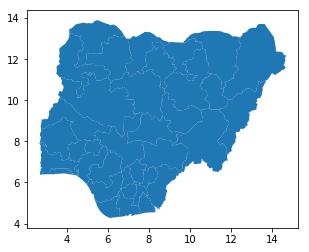

In [3]:
#preview the map

map_df.plot()

In [4]:
#let's load our Google data to join with the geodataframe

df = pd.read_csv("geoMap_nigeria.csv", header=0)
df.head()


,Region,Malaria
0,Ebonyi,100
1,Plateau,83
2,Sokoto,76
3,Kwara,75
4,Kano,75


In [5]:
#join the csv data with the geodataframe

merged = map_df.set_index('ADM1_EN').join(df.set_index('Region'))
merged.head()

,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Malaria
ADM1_EN,,,,,,,,,,,,,
Abia,4.695135,0.396543,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((7.386810307000076 6.036674993000076,...",52.0
Adamawa,11.525443,3.113007,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((13.62128924400002 10.94823428400002,...",0.0
Akwa Ibom,5.263830,0.549476,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,(POLYGON ((8.344815101000052 4.611400596000067...,68.0
Anambra,3.595960,0.392661,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((6.932539394000059 6.71089829400006, ...",62.0
Bauchi,13.952005,4.011018,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((10.75125057200006 12.46147679500007,...",64.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


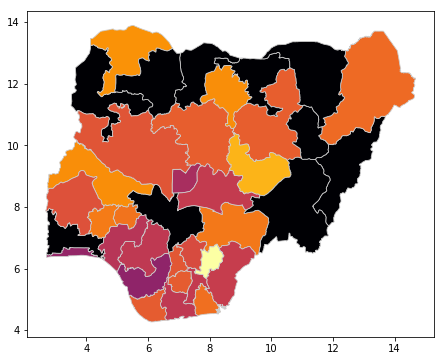

In [6]:
#set a variables that will call whatever column we want to visualize

variable = 'Malaria'

#set the range for the choropleth

vmin, vmax = 0, 100

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10,6))

#create plot
merged.plot(column=variable, cmap='inferno', linewidth=0.8, ax=ax, edgecolor='0.8')


(2.0680194294500387,
 15.279330367550067,
 3.7919368028500324,
 14.375489720150043)

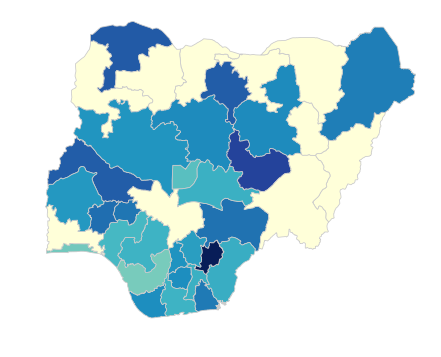

In [7]:
#set a variables that will call whatever column we want to visualize

variable = 'Malaria'

#set the range for the choropleth

vmin, vmax = 0, 100

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10,6))

#create plot
merged.plot(column=variable, cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')


#remove the axis
ax.axis('off')

Text(0.1, 0.08, 'Google Trends, 2019')

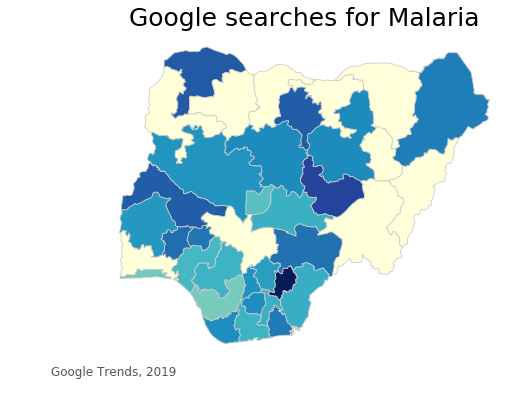

In [8]:

#set a variables that will call whatever column we want to visualize

variable = 'Malaria'

#set the range for the choropleth

vmin, vmax = 0, 100

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10,6))

#create plot
merged.plot(column=variable, cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')


#remove the axis
ax.axis('off')

#add a title

ax.set_title('Google searches for Malaria', fontdict={'fontsize': '25', 'fontweight': '3'})

#create an annotation for the data source 

ax.annotate('Google Trends, 2019', xy=(0.1, .08), 
            xycoords='figure fraction', horizontalalignment='left',
           verticalalignment='top', fontsize=12, color='#555555')


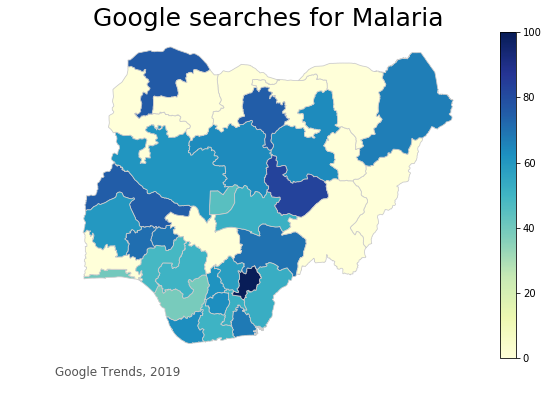

In [9]:
#set a variables that will call whatever column we want to visualize

variable = 'Malaria'

#set the range for the choropleth

vmin, vmax = 0, 100

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10,6))

#create plot
merged.plot(column=variable, cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')


#remove the axis
ax.axis('off')

#add a title

ax.set_title('Google searches for Malaria', fontdict={'fontsize': '25', 'fontweight': '3'})

#create an annotation for the data source 

ax.annotate('Google Trends, 2019', xy=(0.1, .08), 
            xycoords='figure fraction', horizontalalignment='left',
           verticalalignment='top', fontsize=12, color='#555555')


#add color legend 
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

#empty array for the data range 

sm._A = []

#add the colorbar  to the figure

cbar = fig.colorbar(sm)

In [10]:
#save figure
fig.savefig("map_nigeria.png", dpi=300)

# EXERCISE: Construct a map for Ethiopia using the data provided